In [2]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('../data/ml-latest-small/ratings.csv')
df.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [8]:
n_users = df.userId.unique().shape[0]
n_items = df.movieId.unique().shape[0]
print(str(n_users) + ' users')
print(str(n_items) + ' items')

610 users
9724 items


In [14]:
ratingsNum = np.zeros((n_users, n_items))
ratingsNum
for row in df.itertuples():
    ratingsNum[row[1]-1, row[2]-1] = 1
print(ratingsNum)

IndexError: index 46969 is out of bounds for axis 1 with size 9724

In [6]:
itemRateNumCurrent = ratingsNum.sum(axis=0)

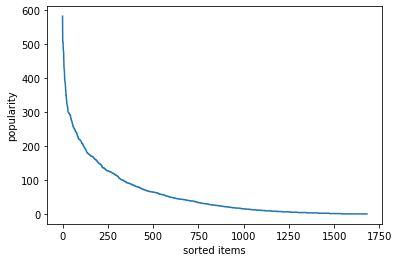

In [7]:
itemRateNumCurrent.sort()

itemRateNumCurrent
import matplotlib.pyplot as plt
plt.plot(itemRateNumCurrent[::-1])
plt.xlabel('sorted items') # adds label to x axis
plt.ylabel('popularity') # adds label to y axis
plt.show()

In [8]:
ratings = np.zeros((n_users, n_items))
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
print(ratings)

[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [9]:
itemRateNum = ratingsNum.sum(axis=0)
itemRateSum = ratings.sum(axis=0)
itemRateAvg = itemRateSum/itemRateNum
print(itemRateAvg)
print(itemRateNum)

[3.87831858 3.20610687 3.03333333 ... 2.         3.         3.        ]
[452. 131.  90. ...   1.   1.   1.]


In [10]:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('u.item', sep='|', names=i_cols, encoding='latin-1')
n 
items.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
#Implementation of MovieAvg to recommend the top_n = 5 movies to the activeUser = 0
#change top_n to a larger number to recommend more movie

top_n = 5
activeUser = 0
mask_activeUser = ratings[activeUser, :] > 0
itemRateAvgCurrent = itemRateAvg.copy()
itemRateAvgCurrent[mask_activeUser] = 0
itemSortInd = itemRateAvgCurrent.argsort()
print('movie ID' + '\t movie title')
print(items['movie title'][itemSortInd[range(len(itemSortInd)-1,len(itemSortInd)-top_n-1, -1)]])

movie ID	 movie title
1535                                 Aiqing wansui (1994)
1652    Entertaining Angels: The Dorothy Day Story (1996)
1200           Marlene Dietrich: Shadow and Light (1996) 
1598                        Someone Else's America (1995)
1121                       They Made Me a Criminal (1939)
Name: movie title, dtype: object


In [16]:
#Implementation of TopPop to recommend the top_n = 5 movies to the activeUser = 0

top_n = 10
activeUser = 1
mask_activeUser = ratings[activeUser, :] > 0
itemRateNumCurrent = itemRateNum.copy()
#print(itemRateNumCurrent)
itemRateNumCurrent[mask_activeUser] = 0
itemSortInd = itemRateNumCurrent.argsort()
print('movie ID' + '\t movie title')
print(items['movie title'][itemSortInd[range(len(itemSortInd)-1,len(itemSortInd)-top_n-1, -1)]])

movie ID	 movie title
180           Return of the Jedi (1983)
120       Independence Day (ID4) (1996)
173      Raiders of the Lost Ark (1981)
55                  Pulp Fiction (1994)
6                 Twelve Monkeys (1995)
97     Silence of the Lambs, The (1991)
116                    Rock, The (1996)
171     Empire Strikes Back, The (1980)
221     Star Trek: First Contact (1996)
203           Back to the Future (1985)
Name: movie title, dtype: object
